In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
for column in df.columns:
    df[column]= le.fit_transform(df[column])

X= df.drop(columns=['salary_more_then_100k'])
y= df['salary_more_then_100k']


In [5]:
X

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [6]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [8]:
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn.metrics import accuracy_score

In [9]:
finalData = DecisionTreeClassifier(criterion='entropy')
finalData.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [10]:
y_predict = finalData.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.75

In [11]:
print(export_text(finalData,feature_names= list(X.columns)))

|--- job <= 0.50
|   |--- class: 1
|--- job >  0.50
|   |--- company <= 1.50
|   |   |--- company <= 0.50
|   |   |   |--- class: 0
|   |   |--- company >  0.50
|   |   |   |--- class: 1
|   |--- company >  1.50
|   |   |--- job <= 1.50
|   |   |   |--- degree <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- degree >  0.50
|   |   |   |   |--- class: 1
|   |   |--- job >  1.50
|   |   |   |--- class: 0



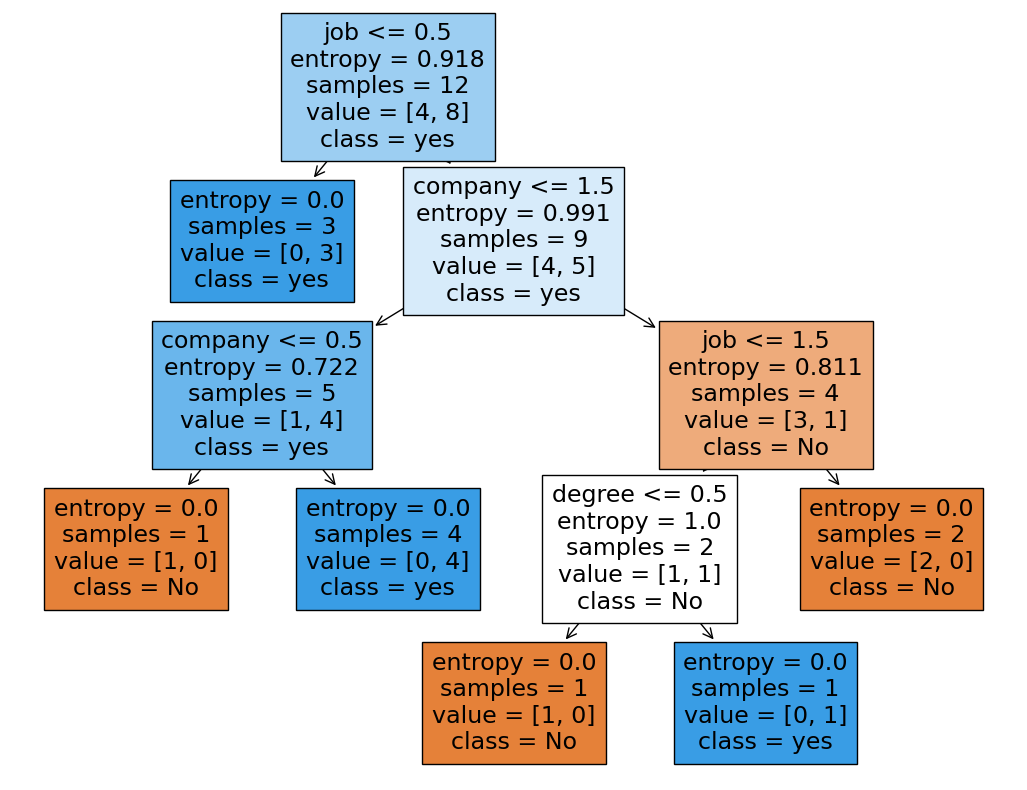

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plot_tree(finalData,feature_names=X.columns,class_names=['No','yes'],filled= True)
plt.show()